#Taller Regresion Johan Santiago Caro Valencia y Juan Sebastian Rodriguez Salazar

#Install Libraries

#Import Libraries

In [ ]:
# Core
import pandas as pd
import numpy as np
import sklearn
import math
import keras

# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Tensorflow
import tensorflow
from tensorflow import keras
from keras import layers,models
from keras.models import Sequential
from keras.layers import Dense

# Models - Regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Models - Clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
import plotly.graph_objects as go


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import cross_val_score, KFold

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display, Markdown

#Funcion Limpieza NA

In [ ]:
listaEstrategias = ['mean', 'median', 'most_frequent']

def reemplazar_nulos(dataframe, estrategia, columnas):

  if(estrategia in ['mean', 'median', 'most_frequent']):
    imputer = SimpleImputer(missing_values = np.nan, strategy = estrategia)
    imputer. fit(dataframe[columnas])

    dataframe[columnas] = imputer.transform(dataframe[columnas])
  else:
    raise Exception("Estrategia Invalida")



def reemplazar_nulos_constante(dataframe, columnas, constante):

    imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value= constante)
    imputer. fit(dataframe[columnas])

    dataframe[columnas] = imputer.transform(dataframe[columnas])


In [ ]:
def fillnaObject(dataframe):
  for columna in dataframe.columns:
        if dataframe[columna].dtype == 'object':
            dataframe[columna].fillna('no', inplace=True)

  return dataframe

#Funcion Conversion Categorica A numericas

In [ ]:
def obtener_columnas_categoricas(dataframe):
    columnas_categoricas = []
    for columna in dataframe.columns:
        if pd.api.types.is_object_dtype(dataframe[columna]):
            columnas_categoricas.append(columna)
    return columnas_categoricas

In [ ]:
def convertCategorico(dataframe, columnas):
    encoded_data = pd.get_dummies(dataframe, columns=columnas)
    return encoded_data


#Encode Label

In [ ]:
def encodeLabel(dataframe, columnas):
  le = LabelEncoder()
  for i in columnas:
    dataframe[i] = le.fit_transform(dataframe[i])

#Matrix de correlacion

In [ ]:
def correlacion_matrix(data, column, porcentajeCorrelacion):
  corr_matrix = data.corr()

  top_corr_features = corr_matrix.index[abs(corr_matrix[column]) >= porcentajeCorrelacion]


  plt.figure(figsize=(10, 6))
  sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm")

  plt.title(f'Matriz de Correlación de las Variables mas correlacionadas con {column}')
  plt.show()



#Split Data Frame

In [ ]:
def splitData(dataframe, columnY):
  X = dataframe.drop([columnY], axis = 1)
  y = dataframe[columnY]

  return X, y


def trainTest(X, y, testSize, randomState):
  X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = testSize, random_state = randomState)

  return X_train, X_test, y_train, y_test

#Regresion Coeficientes Funcion

In [ ]:
def linear_regression_equation(model):
    coef = model.coef_.round(2)
    intercept = model.intercept_.round(2)

    equation_terms = [f"{coef[i]} * X{i+1}" for i in range(len(coef))]

    equation = f"y = {intercept} + " + " + ".join(equation_terms)
    return equation

#Load Dataset

Link de la base de datos: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
data = pd.read_csv('train.csv')

#Limpieza de datos

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data['LotFrontage'] = data['LotFrontage'].fillna(0)

In [ ]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [ ]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [ ]:
data = fillnaObject(data)

In [ ]:
columnasCategoricas = obtener_columnas_categoricas(data)

In [ ]:
print(columnasCategoricas)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
data = convertCategorico(data, columnasCategoricas)

In [ ]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
data = data.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [ ]:
data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 305, dtype: int64

In [ ]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data = data.drop('Id', axis = 1)

In [ ]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


#Matrix de Correlacion

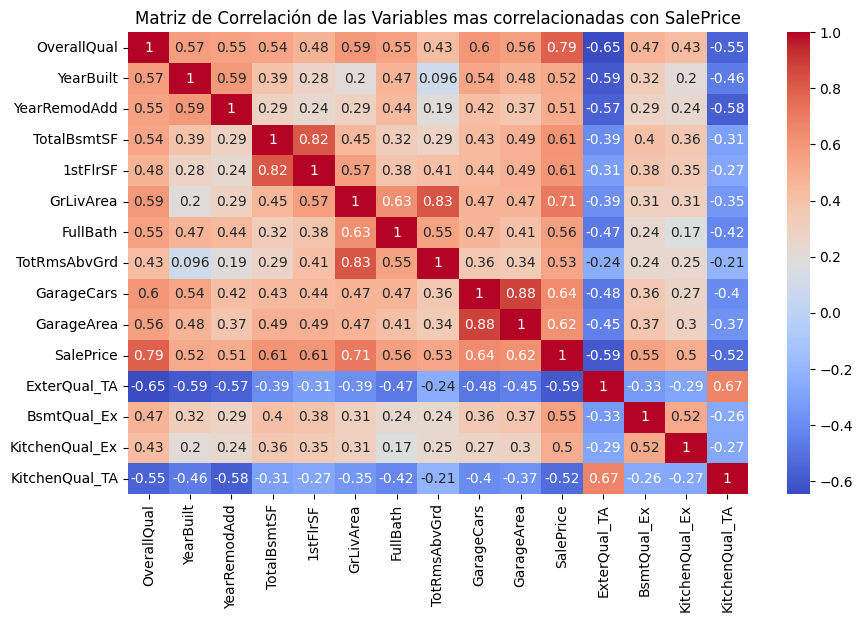

In [ ]:
correlacion_matrix(data, 'SalePrice', 0.50)

#Split the Data

In [ ]:
X, y = splitData(data, 'SalePrice')

In [ ]:
X_train, X_test, y_train, y_test = trainTest(X, y, 0.1, 42)

In [ ]:
sc= StandardScaler()

X_train_sc= sc.fit_transform(X_train)

X_test_sc= sc.transform(X_test)

#Random Forest para elegir las mejores variables

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_sc, y_train)
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
selected_features = feature_importances[feature_importances['importance'] > 0.01].index.tolist()

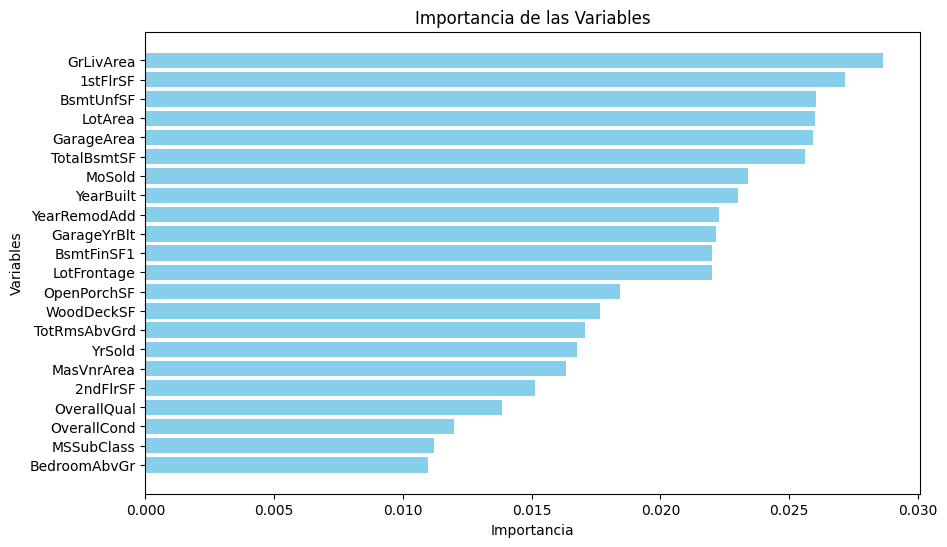

In [ ]:
feature_importances2 = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])


selected_features2 = feature_importances[feature_importances['importance'] > 0.01]


selected_features2 = selected_features2.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(selected_features2.index, selected_features2['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables')
plt.gca().invert_yaxis()

In [ ]:
selected_features2

,importance
GrLivArea,0.028661
1stFlrSF,0.027167
BsmtUnfSF,0.026046
LotArea,0.026020
GarageArea,0.025916
TotalBsmtSF,0.025599
MoSold,0.023405
YearBuilt,0.023018
YearRemodAdd,0.022288
GarageYrBlt,0.022150


In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
sc= StandardScaler()

X_train_sc= sc.fit_transform(X_train)

X_test_sc= sc.transform(X_test)

In [ ]:
X_train.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageYrBlt     0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

#Regresion Lineal

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test_sc)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1509159116.1018467
Error absoluto medio (MAE): 21577.742988828883
Coeficiente de determinación (R^2): 0.8348233980350609


In [ ]:
linear_regression_equation(regressor)

'y = 180704.73 + -7900.46 * X1 + -670.57 * X2 + 5087.99 * X3 + 27572.3 * X4 + 4716.23 * X5 + 11303.1 * X6 + 3600.74 * X7 + 3440.08 * X8 + 3809.12 * X9 + -2921.23 * X10 + 5565.82 * X11 + 5372.42 * X12 + 5818.69 * X13 + 16735.08 * X14 + -7586.58 * X15 + 8119.82 * X16 + -4090.78 * X17 + 8791.27 * X18 + 3593.74 * X19 + -384.29 * X20 + 374.8 * X21 + -1014.06 * X22'

In [ ]:
data = {
    'Variable': ['x0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22'],
    'Coeficiente': [180704.73, -7900.46, -670.57, 5087.99, 27572.3, 4716.23, 11303.1, 3600.74, 3440.08, 3809.12, -2921.23, 5565.82, 5372.42, 5818.69, 16735.08, -7586.58, 8119.82, -4090.78, 8791.27, 3593.74, -384.29, 374.8, -1014.06]
}


df = pd.DataFrame(data)


fig = go.Figure(data=[go.Table(
    columnwidth = [1, 5],  # Aquí ajustamos el ancho de las columnas
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.Variable, df.Coeficiente],
               fill_color='lavender',
               align='left'))
])


fig.show()

Validacion Cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)


In [ ]:
mse_scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

In [ ]:
print(-mse_scores)

[1.09651770e+09 2.62339763e+09 8.98995460e+08 1.59213239e+09
 9.38922961e+08]


Error cuadrático medio (MSE): 1509159116.1018467
Error absoluto medio (MAE): 21577.742988828883
Coeficiente de determinación (R^2): 0.8348233980350609


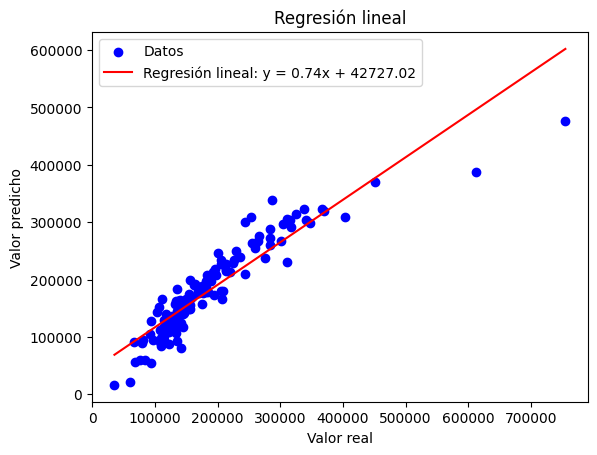

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)


plt.scatter(y_test, y_pred, color='blue', label='Datos')


slope, intercept = np.polyfit(y_test, y_pred, 1)
x = np.linspace(min(y_test), max(y_test), 100)
y = slope * x + intercept

plt.plot(x, y, color='red', label=f'Regresión lineal: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Regresión lineal')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 1509159116.1018467
Error absoluto medio (MAE): 21577.742988828883
Coeficiente de determinación (R^2): 0.8348233980350609


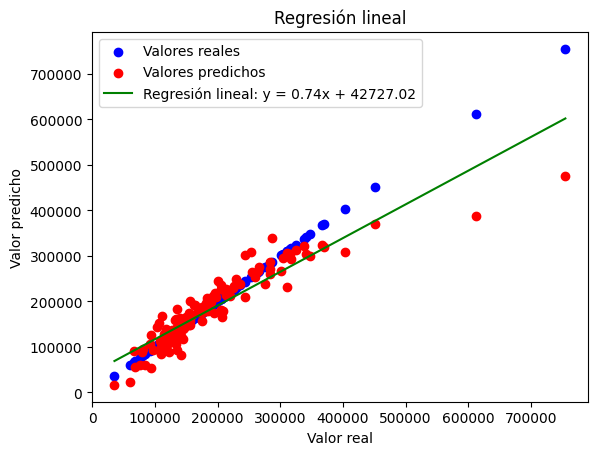

In [ ]:
# Calcular los errores y el coeficiente de determinación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)


plt.scatter(y_test, y_test, color='blue', label='Valores reales')
plt.scatter(y_test, y_pred, color='red', label='Valores predichos')


slope, intercept = np.polyfit(y_test, y_pred, 1)
x = np.linspace(min(y_test), max(y_test), 100)
y = slope * x + intercept


plt.plot(x, y, color='green', label=f'Regresión lineal: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Regresión lineal')
plt.legend()
plt.show()

In [ ]:
X_train_with_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        05:35:53   Log-Likelihood:                -15598.
No. Observations:                1314   AIC:                         3.124e+04
Df Residuals:                    1291   BIC:                         3.136e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.923e+05   1.48e+06      0.266   

#Support Vector Machine

In [ ]:
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [ ]:
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1863134208.736884
Error absoluto medio (MAE): 23926.074013882175
Coeficiente de determinación (R^2): 0.7960810266324325


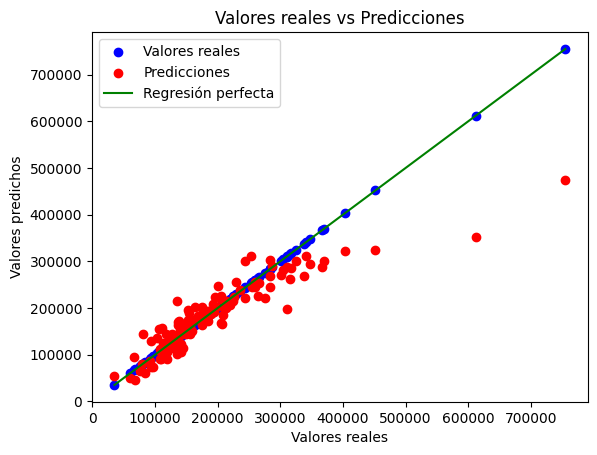

In [ ]:


# Tus predicciones
predictions = regressor.predict(X_test)

# Crear un gráfico de dispersión de los valores reales frente a los valores predichos
plt.scatter(y_test, y_test, color='blue', label='Valores reales')
plt.scatter(y_test, predictions, color='red', label='Predicciones')

# Crear una línea que representa la regresión perfecta
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='green', label='Regresión perfecta')

plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Predicciones')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=22, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train, epochs=100, batch_size=32)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36383195136.0000
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25227046912.0000
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10872837120.0000
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6517202432.0000
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4801958400.0000
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5031112192.0000
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4956220416.0000
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3666491136.0000
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3722062080.0000
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3251639296.0000
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3323079424.0000
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3855179264.0000
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2905483520.0000
Epoch 14/100
42/42 ━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


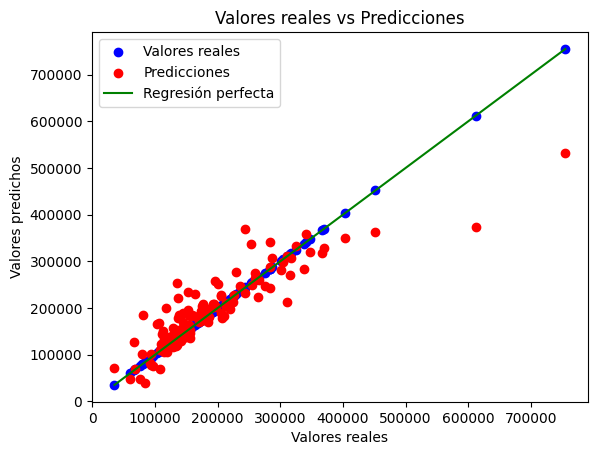

In [ ]:
predictions = model.predict(X_test)


plt.scatter(y_test, y_test, color='blue', label='Valores reales')
plt.scatter(y_test, predictions, color='red', label='Predicciones')


min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='green', label='Regresión perfecta')

plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Predicciones')
plt.legend()
plt.show()

<ipython-input-59-f4821b208a2a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




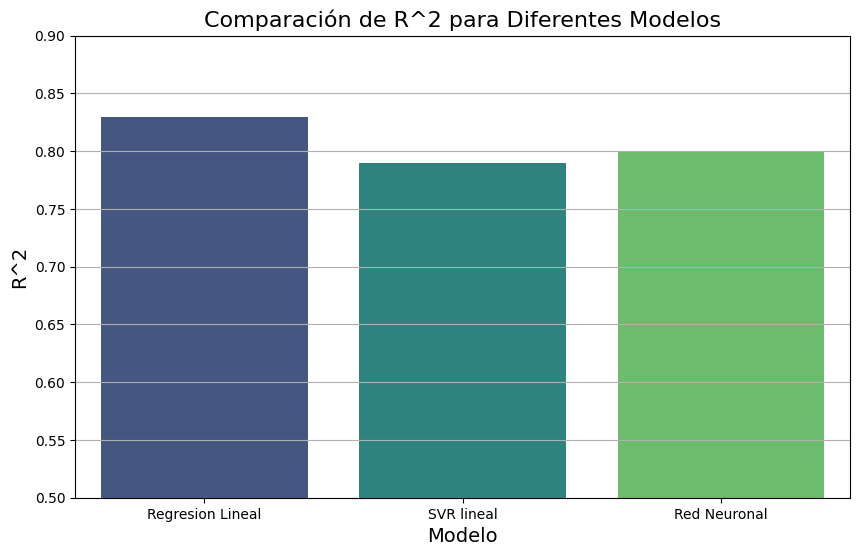

In [ ]:
r2_svr_linear = 0.83
r2_svr_poly =  0.79
r2_nn = 0.80


r2_values = [r2_svr_linear, r2_svr_poly, r2_nn]


models = ['Regresion Lineal', 'SVR lineal', 'Red Neuronal']


plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values, palette='viridis')

plt.xlabel('Modelo', fontsize=14)
plt.ylabel('R^2', fontsize=14)
plt.title('Comparación de R^2 para Diferentes Modelos', fontsize=16)
plt.ylim(0.5, 0.9)
plt.grid(axis='y')

plt.show()

<ipython-input-60-4748fe0020a1>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




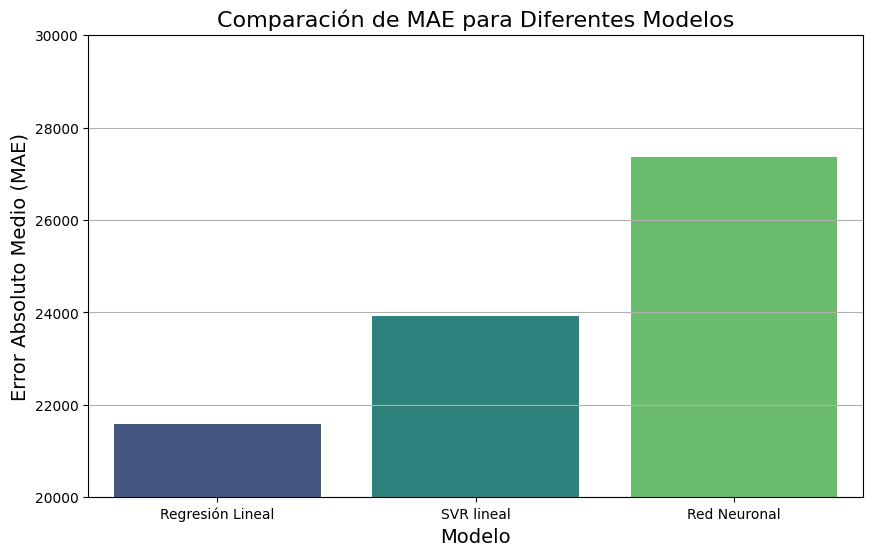

In [ ]:
mae_regression = 21577.742988828883
mae_svr_linear = 23926.074013882175
mae_nn = 27362.01005993151

mae_values = [mae_regression, mae_svr_linear, mae_nn]
models = ['Regresión Lineal', 'SVR lineal', 'Red Neuronal']


plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae_values, palette='viridis')


plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Error Absoluto Medio (MAE)', fontsize=14)
plt.title('Comparación de MAE para Diferentes Modelos', fontsize=16)
plt.ylim(20000, 30000)
plt.grid(axis='y')

plt.show()